In [18]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

folder = 'fig'

In [ ]:
img = cv2.imread(Path(folder, 'dog.bmp'), cv2.IMREAD_COLOR)

h, w = img.shape[:2]
print(f"width x height = {w} x {h}")

if img is None:
    print('image read failed')
    sys.exit()

cv2.namedWindow('img', cv2.WINDOW_AUTOSIZE)
cv2.imshow('img', img)

while True:
    if cv2.waitKey() == ord("q"): # ascii
        break

cv2.destroyAllWindows()

width x height = 640 x 480


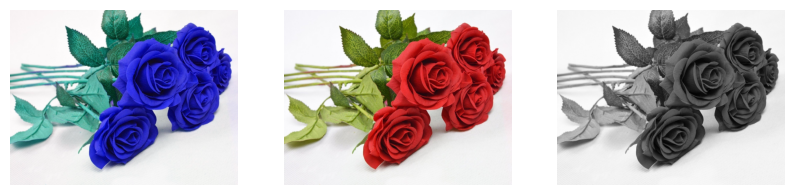

In [15]:
##
img = cv2.imread(Path(folder, 'rose.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

if img is None:
    print("image read failed")
    sys.exit()

img_lists = [img, img_rgb, img_gray]

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for i, img in enumerate(img_lists):
    if i == 2:
        axs[i].imshow(img, cmap='gray')
    else:
        axs[i].imshow(img)
    axs[i].axis('off')

plt.show()

# plt.imshow(img)
# plt.imshow(img_rgb)
# plt.imshow(img_gray, cmap='gray')
# plt.axis('off')
# plt.title("BGR")
# plt.show()

In [ ]:
##
img = cv2.imread(Path(folder, "dog.bmp"))

if img is None:
    print("image read failed")
    sys.exit()

img2 = img # shallow
img3 = img.copy() # deep

img[100:150, 200:300] = (123, 2, 55)
cv2.imshow('img', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)

while True:
    if cv2.waitKey() == ord("q"): # ascii
        break

cv2.destroyAllWindows()

In [19]:
##
img1 = np.ones((800, 600, 3), np.uint8) * 255
img2 = np.zeros((800, 600, 3), np.uint8)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

while True:
    if cv2.waitKey() == ord("q"): # ascii
        break

cv2.destroyAllWindows()

In [21]:
src = cv2.imread(Path(folder, 'airplane.bmp'))
mask = cv2.imread(Path(folder, 'mask_plane.bmp'), cv2.IMREAD_GRAYSCALE)
dst = cv2.imread(Path(folder, "field.bmp"))

if src is None or mask is None or dst is None:
    print('image read failed')
    sys.exit()

cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

while True:
    if cv2.waitKey() == ord("q"): # ascii
        break

cv2.destroyAllWindows()

In [24]:
##
src = cv2.imread(Path(folder, "airplane.bmp"))
maks = cv2.imread(Path(folder, "mask_plane.bmp"), cv2.IMREAD_GRAYSCALE)
dst = cv2.imread(Path(folder, "beach.bmp"))

if src is None or mask is None or dst is None:
    print('image read failed')
    sys.exit()

h, w = src.shape[:2]
dst_crop = dst[100:100+h, 800:800+w]

cv2.copyTo(src, mask, dst_crop)

cv2.imshow('src', src)
cv2.imshow('mask', mask)

cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
cv2.imshow('dst', dst)

while True:
    if cv2.waitKey() == ord("q"): # ascii
        break

cv2.destroyAllWindows()

### 화소점처리

In [25]:
# src = cv2.imread("./fig/lenna.png", cv2.IMREAD_COLOR)
src = cv2.imread(Path(folder, "lenna.png"), cv2.IMREAD_COLOR)

if src is None:
    print("image read failed")
    sys.exit()

dst1 = cv2.add(src, 100) # 클리핑
#dst1 = np.clip(src + 100., 0, 255).astype(np.uint8)

dst2 = cv2.add(src, (0, 0, 250, 0)) # 클리핑

cv2.imshow("src", src)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
## 사칙연산

src1 = cv2.imread(Path(folder, "lenna.png"), cv2.IMREAD_GRAYSCALE)
src2 = np.zeros((220, 220), np.uint8)
cv2.circle(src2, (110, 110), 80, 200, -1)
cv2.circle(src2, (110, 110), 40, 50, -1)

if src is None:
    print("image read failed")
    sys.exit()

# cv2.divide, cv2.multiply()
dst1 = cv2.add(src1, src2)

dst2 = cv2.subtract(src1, src2)
dst3 = cv2.addWeighted(src1, 0.8, src2, 0.2, 0.0)
dst4 = cv2.absdiff(src1, src2)
dst5 = cv2.divide(src1, 2)
dst6 = cv2.multiply(src1, 2)

cv2.imshow("src1", src1)
cv2.imshow("src2", src2)
cv2.imshow("add", dst1)
cv2.imshow("subtract", dst2)
cv2.imshow("addWeighted", dst3)
cv2.imshow("absdiff", dst4)
cv2.imshow("divide", dst5)
cv2.imshow("multiply", dst6)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('./fig/rose.jpg')
background = np.ones_like(src)*255

weight = np.arange(0, 1, 0.01)

for i in weight:
    dst = cv2.addWeighted(src, i, background, 1-i, 0.0)

cv2.imshow('src', src)
cv2.imshow('background', background)

cv2.waitKey()
cv2.destroyAllWindows()

### 히스토그램

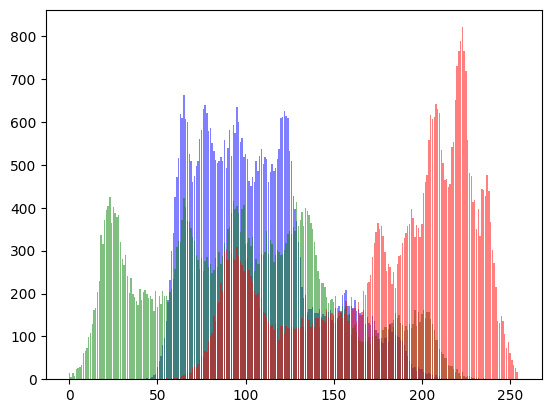

In [44]:
src = cv2.imread(Path(folder, 'lenna.png'), cv2.IMREAD_COLOR)

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 255])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 255])

plt.bar(np.arange(len(hist_b)), hist_b[:, 0], color="b", label="b chanel", alpha=0.5)
plt.bar(np.arange(len(hist_g)), hist_g[:, 0], color="g", label="g chanel", alpha=0.5)
plt.bar(np.arange(len(hist_r)), hist_r[:, 0], color="r", label="r chanel", alpha=0.5)
plt.show()

cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

# 2장 OpenCV를 이용한 기하학적 변환

In [1]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
from pathlib import Path

folder = 'fig'

## 2D Convolution/filtering

In [61]:
src = cv2.imread(Path(folder, 'blue_eyes.png'), cv2.IMREAD_REDUCED_COLOR_2)

kernel_3 = np.ones((3, 3))/9.
kernel_5 = np.ones((5, 5))/25.
print("kernel_3 = \n", kernel_3)
print("kernel_5 = \n", kernel_5)

dst_kernel3 = cv2.filter2D(src, -1, kernel_3)
dst_kernel5 = cv2.filter2D(src, -1, kernel_5)

dst_blur3 = cv2.blur(src, (3, 3)) # 평균 필터
dst_blur5 = cv2.blur(src, (5, 5)) # 평균 필터

cv2.putText(dst_kernel3, "3x3", (10, 40), 0, 1, (255, 0, 0), 2, cv2.LINE_AA)
cv2.putText(dst_kernel5, "5x5", (10, 40), 0, 1, (255, 0, 0), 2, cv2.LINE_AA)

cv2.putText(dst_blur3, "blur 3x3", (10, 40), 0, 1, (255, 0, 0), 2, cv2.LINE_AA)
cv2.putText(dst_blur5, "blur 5x5", (10, 40), 0, 1, (255, 0, 0), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst_kernel3', dst_kernel3)
cv2.imshow('dst_kernel5', dst_kernel5)
cv2.imshow('dst_blur3', dst_blur3)
cv2.imshow('dst_blur5', dst_blur5)

cv2.waitKey()
cv2.destroyAllWindows()

kernel_3 = 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
kernel_5 = 
 [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


## 가우시안 필터링 (Gaussian filter), 노이즈제거

In [62]:
# GaussianBlur(src, (ksize), sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
# src: 입력영상
# ksize: mean filter kernel size, (0, 0) 자동으로 결정
# sigmaX:  gaussian x 방향의 sigma
# sigmaY:  gaussian y 방향의 sigma

In [70]:
src = cv2.imread(Path(folder, 'blue_eyes.png'), cv2.IMREAD_REDUCED_COLOR_2)

dst_Gaussian0_5 = cv2.GaussianBlur(src, (0, 0), 0.5)
dst_Gaussian1 = cv2.GaussianBlur(src, (0, 0), 1)
dst_Gaussian2 = cv2.GaussianBlur(src, (0, 0), 2)
dst_Gaussian3 = cv2.GaussianBlur(src, (0, 0), 3)
dst_mean = cv2.blur(src, (5, 5))

cv2.imshow("src", src)
cv2.imshow("dst_Gaussian sig = 0.5", dst_Gaussian0_5)
cv2.imshow("dst_Gaussian sig = 1", dst_Gaussian1)
cv2.imshow("dst_Gaussian sig = 2", dst_Gaussian2)
cv2.imshow("dst_Gaussian sig = 3", dst_Gaussian3)
cv2.imshow("dst_mean", dst_mean)

cv2.waitKey()
cv2.destroyAllWindows()

## Sharpening filter

In [73]:
## dst = 2*src - GaussianBlur

src = cv2.imread(Path(folder, 'blue_eyes.png'), cv2.IMREAD_REDUCED_COLOR_2)

blr = cv2.GaussianBlur(src, (0, 0), 1)
blr2 = cv2.GaussianBlur(src, (0, 0), 2)
blr3 = cv2.GaussianBlur(src, (0, 0), 3)

dst = cv2.addWeighted(src, 2, blr, -1, 0.0)
dst2 = cv2.addWeighted(src, 2, blr2, -1, 0.0)
dst3 = cv2.addWeighted(src, 2, blr3, -1, 0.0)

cv2.imshow("src", src)
cv2.imshow("blr", blr)
cv2.imshow("sharpening1", dst)
cv2.imshow("sharpening2", dst2)
cv2.imshow("sharpening3", dst3)

cv2.waitKey()
cv2.destroyAllWindows()

In [83]:
src = cv2.imread(Path(folder, 'blue_eyes.png'), cv2.IMREAD_REDUCED_COLOR_2)

kernel_3 = np.ones((3, 3), dtype=np.float64)*-.5
kernel_3[1, 1] = 5

dst_sharp = cv2.filter2D(src, -1, kernel_3)
print(kernel_3)

cv2.imshow("src", src)
cv2.imshow("dst_sharp", dst_sharp)

cv2.waitKey()
cv2.destroyAllWindows()

[[-0.5 -0.5 -0.5]
 [-0.5  5.  -0.5]
 [-0.5 -0.5 -0.5]]


In [8]:
##

src = cv2.imread(Path(folder, 'blue_eyes.png'), cv2.IMREAD_REDUCED_GRAYSCALE_2)
salt_noise = np.random.choice((0, 255), src.shape, p=(0.99, 0.01)).astype(np.uint8)
pepper_noise = np.random.choice((0, 255), src.shape, p=(0.99, 0.01)).astype(np.uint8)

dst = cv2.add(src, salt_noise)
dst = cv2.subtract(dst, pepper_noise)

dst_Gaussian = cv2.GaussianBlur(dst, (0, 0), 1)
dst_mean = cv2.blur(dst, (3, 3))
dst_median = cv2.medianBlur(dst, 3)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.imshow("dst_mean", dst_mean)
cv2.imshow("dst_Gaussian", dst_Gaussian)
cv2.imshow("dst_median", dst_median)

cv2.waitKey()
cv2.destroyAllWindows()

## Cartoon 영상

In [ ]:
src = cv2.imread(Path(folder, 'son.jpg'))

cv2.imshow("src", src)

blr = cv2.GaussianBlur(src, (0, 0), 2) # color
edge = 255 - cv2.Canny(src, 100, 200)  # gray
edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
dst = cv2.bitwise_and(src, edge) # minimun

cv2.imshow('src', src)
cv2.imshow('blr', blr)
cv2.imshow('edge', edge)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

# 기하학적 변환 (Geometry transform)

### 영상 이동

In [18]:
# warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
# src: 입력영상
# M: affine transform matrix (size: 2 x 3)
# dsize: 출력영상 크기, (0, 0) = 입력영상크기로 출력
# borderValue: 값이 없는 영역을 채우는 값, default  = 0

In [37]:
src = cv2.imread(Path(folder, 'dog.bmp'))

## affine matrix
affine = np.array([[1, 0, 50],
                   [0, 1, 200]], np.float32)

print("affine matrix: \n", affine)

dst = cv2.warpAffine(src, affine, (0, 0),
                     borderMode=None,
                     borderValue=(255, 255, 255))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

affine matrix: 
 [[  1.   0.  50.]
 [  0.   1. 200.]]


### 영상 회전

In [38]:
# warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
# src: 입력영상
# M: affine transform matrix (size: 2 x 3)
# dsize: 출력영상 크기, (0, 0) = 입력영상크기로 출력
# borderValue: 값이 없는 영역을 채우는 값, default  = 0

# getRotationMatrix2D(center, angle, scale) -> retval
# center: 영상의 center
# angle: 회전각도
# scale: 확대율

In [48]:
src = cv2.imread(Path(folder, 'dog.bmp'))

h, w = src.shape[:2]
cp = (w//2, h//2)
affine = cv2.getRotationMatrix2D(cp, 30, 1.)
print("affine = \n", affine)

dst = cv2.warpAffine(src, affine, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

affine = 
 [[  0.8660254    0.5        -77.12812921]
 [ -0.5          0.8660254  192.15390309]]


### 영상 확대 (Scaling)

In [69]:
src = cv2.imread(Path(folder, 'rose.jpg'))

affine = np.array([[0.5, 0, 0],
                   [0, 0.8, 0]], np.float32)

h, w = src.shape[:2]

dst = cv2.warpAffine(src, affine, (int(w*0.5), int(h*0.8)))
cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

### 전단 변환

In [92]:
src = cv2.imread(Path(folder, 'dog.bmp'))

affine = np.array([[1, 0.2, 0],
                   [0, 1, 0]], np.float32)

h, w = src.shape[:2]

dst = cv2.warpAffine(src, affine, (w + int(h*0.2), h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [77]:
dst.shape

(480, 704, 3)

### Perspective transform

In [ ]:
src = cv2.imread(Path(folder, 'checkerboard.png'))

h, w = src.shape[:2]

cv2.imshow('src', src)
# cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()